In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/olympics/olympics.csv


**Read CSV file**

In [2]:
df = pd.read_csv('../input/olympics/olympics.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


**Skipping rows**

In [3]:
olympics_df = pd.read_csv('../input/olympics/olympics.csv', skiprows = 1, skipfooter=1, header = 0)
olympics_df

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Unnamed: 0,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Yugoslavia (YUG) [YUG],16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
142,Independent Olympic Participants (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
143,Zambia (ZAM) [ZAM],12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
144,Zimbabwe (ZIM) [ZIM],12,3,4,1,8,1,0,0,0,0,13,3,4,1,8


In [4]:
oly_df = pd.read_csv('../input/olympics/olympics.csv', skiprows = 1, header = 0)
oly_df

,Unnamed: 0,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Independent Olympic Participants (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
143,Zambia (ZAM) [ZAM],12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
144,Zimbabwe (ZIM) [ZIM],12,3,4,1,8,1,0,0,0,0,13,3,4,1,8
145,Mixed team (ZZX) [ZZX],3,8,5,4,17,0,0,0,0,0,3,8,5,4,17


**Rename Columns**

In [5]:
new_names = {
    'Unnamed: 0': 'Country',
    '№ Summer': 'Summer Olympics',
    '01 !': 'Gold',
    '02 !': 'Silver',
    '03 !': 'Bronze',
    '№ Winter': 'Winter Olympics',
    '01 !.1': 'Gold.1',
    '02 !.1': 'Silver.1',
    '03 !.1': 'Bronze.1',
    '№ Games': 'Total Games', 
    '01 !.2': 'Total Gold',
    '02 !.2': 'Total Silver',
    '03 !.2': 'Total Bronze'
}

olympics_df.rename(columns=new_names, inplace = True)
olympics_df.head()

,Country,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,Total Games,Total Gold,Total Silver,Total Bronze,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [6]:
oly_df.rename(columns=new_names, inplace=True)
oly_df.head()

,Country,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,Total Games,Total Gold,Total Silver,Total Bronze,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


**Remove country code from Country columns**

In [7]:
test = olympics_df['Country'].str.split('(',expand=True)
olympics_df['Country'] = test[0]
olympics_df['Country']
olympics_df.head()

,Country,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,Total Games,Total Gold,Total Silver,Total Bronze,Combined total
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [8]:
test = oly_df['Country'].str.split('(',expand=True)
oly_df['Country'] = test[0]
oly_df['Country']
oly_df.head()

,Country,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,Total Games,Total Gold,Total Silver,Total Bronze,Combined total
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [9]:
oly_df.tail()

,Country,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,Total Games,Total Gold,Total Silver,Total Bronze,Combined total
142,Independent Olympic Participants,1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
143,Zambia,12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
144,Zimbabwe,12,3,4,1,8,1,0,0,0,0,13,3,4,1,8
145,Mixed team,3,8,5,4,17,0,0,0,0,0,3,8,5,4,17
146,Totals,27,4809,4775,5130,14714,22,959,958,948,2865,49,5768,5733,6078,17579


**Summary of Olympics Data**

In [10]:
olympics_df.describe()

,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,Total Games,Total Gold,Total Silver,Total Bronze,Combined total
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,13.383562,32.938356,32.705479,35.136986,100.780822,6.595890,6.568493,6.561644,6.493151,19.623288,19.979452,39.506849,39.267123,41.630137,120.404110
std,7.006657,96.745184,80.648421,77.118416,252.700436,7.349012,18.975086,18.606996,17.499654,54.640914,13.084062,109.932471,93.984393,89.826117,291.988913
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,1.000000,1.000000,2.250000
50%,13.000000,3.000000,4.000000,6.000000,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,15.000000,3.000000,4.000000,6.500000,12.000000
75%,18.000000,23.000000,26.750000,28.750000,85.250000,10.000000,0.750000,1.750000,1.000000,4.750000,26.000000,24.500000,28.000000,29.000000,87.750000
max,27.000000,976.000000,757.000000,666.000000,2399.000000,22.000000,118.000000,111.000000,100.000000,329.000000,49.000000,1072.000000,859.000000,750.000000,2681.000000


In [11]:
oly_df.describe()

,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,Total Games,Total Gold,Total Silver,Total Bronze,Combined total
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,13.476190,65.428571,64.965986,69.795918,200.190476,6.700680,13.047619,13.034014,12.897959,38.979592,20.176871,78.476190,78.000000,82.693878,239.170068
std,7.072359,405.549990,399.309960,427.187344,1231.306297,7.433186,80.799204,80.634421,79.588388,240.917324,13.257048,485.013378,478.860334,505.855110,1469.067883
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,1.000000,1.000000,2.500000
50%,13.000000,3.000000,4.000000,6.000000,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,15.000000,3.000000,4.000000,7.000000,12.000000
75%,18.500000,24.000000,28.000000,29.000000,86.000000,10.000000,1.000000,2.000000,1.000000,5.000000,27.000000,25.500000,29.000000,32.500000,89.000000
max,27.000000,4809.000000,4775.000000,5130.000000,14714.000000,22.000000,959.000000,958.000000,948.000000,2865.000000,49.000000,5768.000000,5733.000000,6078.000000,17579.000000


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'United States\xa0'),
  Text(1, 0, 'Soviet Union\xa0'),
  Text(2, 0, 'Great Britain\xa0'),
  Text(3, 0, 'Germany\xa0'),
  Text(4, 0, 'France\xa0')])

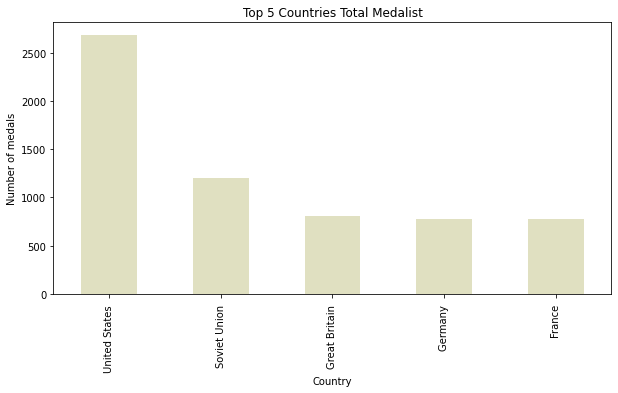

In [12]:
df_top5 = olympics_df.nlargest(n=5, columns='Combined total')
df_top5 = df_top5.groupby("Country", axis=0).sum()
df_top5.head()
df_top5['Combined total'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), rot=90, color=(0.8, 0.8, 0.6, 0.6))
plt.title('Top 5 Countries Total Medalist')
plt.ylabel('Number of medals')
plt.xticks(rotation=90)

United States was the leader of all Olympics Medalist by more than 2500 medals 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bahrain\xa0'),
  Text(1, 0, 'Barbados\xa0'),
  Text(2, 0, 'Bermuda\xa0'),
  Text(3, 0, 'Botswana\xa0'),
  Text(4, 0, 'Burundi\xa0')])

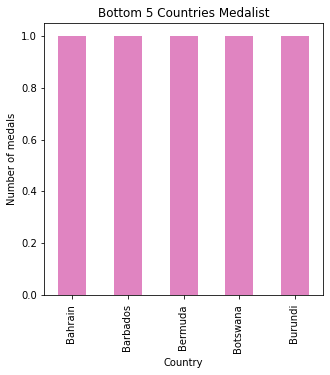

In [13]:
df_btm5 = olympics_df.nsmallest(n=5, columns='Combined total')
df_btm5 = df_btm5.groupby("Country", axis=0).sum()
df_btm5.head()
df_btm5['Combined total'].sort_values(ascending=False).plot(kind='bar', figsize=(5, 5), rot=90, color=(0.8, 0.2, 0.6, 0.6))
plt.title('Bottom 5 Countries Medalist')
plt.ylabel('Number of medals')
plt.xticks(rotation=90)

**Top 5 Winter Gold Olympics Medalist**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Norway\xa0'),
  Text(1, 0, 'United States\xa0'),
  Text(2, 0, 'Germany\xa0'),
  Text(3, 0, 'Soviet Union\xa0'),
  Text(4, 0, 'Canada\xa0')])

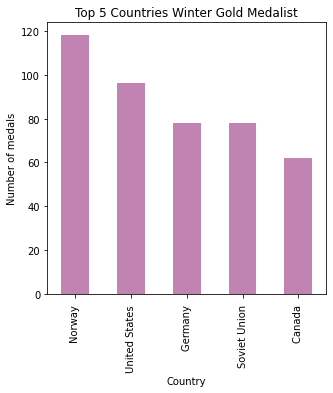

In [14]:
winter_df = olympics_df.nlargest(n=5, columns='Gold.1')
winter_df = winter_df.groupby("Country", axis=0).sum()
winter_df.head()
winter_df['Gold.1'].sort_values(ascending=False).plot(kind='bar', figsize=(5, 5), rot=90, color=(0.6, 0.2, 0.5, 0.6))
plt.title('Top 5 Countries Winter Gold Medalist')
plt.ylabel('Number of medals')
plt.xticks(rotation=90)

**Top 5 Summer Gold Medalist**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'United States\xa0'),
  Text(1, 0, 'Soviet Union\xa0'),
  Text(2, 0, 'Great Britain\xa0'),
  Text(3, 0, 'France\xa0'),
  Text(4, 0, 'China\xa0')])

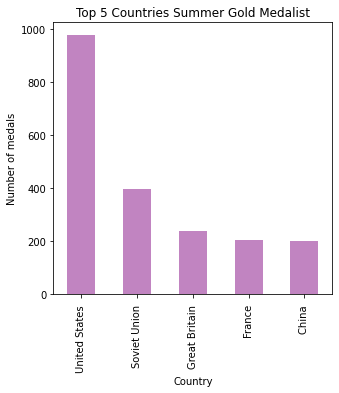

In [15]:
summer_df = olympics_df.nlargest(n=5, columns='Gold')
summer_df = summer_df.groupby("Country", axis=0).sum()
summer_df.head()
summer_df['Gold'].sort_values(ascending=False).plot(kind='bar', figsize=(5, 5), rot=90, color=(0.6, 0.2, 0.6, 0.6))
plt.title('Top 5 Countries Summer Gold Medalist')
plt.ylabel('Number of medals')
plt.xticks(rotation=90)

**Top 10 Participant at Summer Olympics**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'France\xa0'),
  Text(1, 0, 'Great Britain\xa0'),
  Text(2, 0, 'Greece\xa0'),
  Text(3, 0, 'Switzerland\xa0'),
  Text(4, 0, 'Austria\xa0'),
  Text(5, 0, 'Denmark\xa0'),
  Text(6, 0, 'Italy\xa0'),
  Text(7, 0, 'Sweden\xa0'),
  Text(8, 0, 'United States\xa0'),
  Text(9, 0, 'Australia\xa0')])

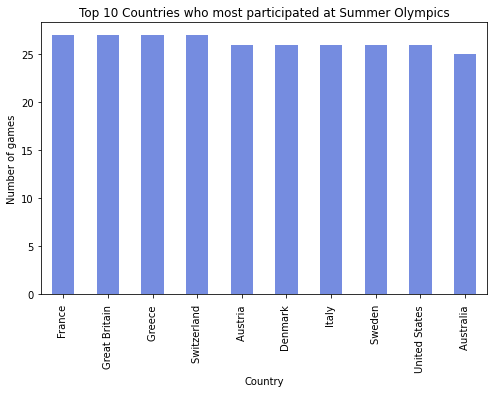

In [16]:
participant = olympics_df.nlargest(n=10, columns='Summer Olympics')
participant = participant.groupby("Country", axis=0).sum()
participant.head()
participant['Summer Olympics'].sort_values(ascending=False).plot(kind='bar', figsize=(8, 5), rot=90, color=(0.1, 0.25, 0.8, 0.6))
plt.title('Top 10 Countries who most participated at Summer Olympics')
plt.ylabel('Number of games')
plt.xticks(rotation=90)

**Top 10 Participant of Winter Olympics Games**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Austria\xa0'),
  Text(1, 0, 'Canada\xa0'),
  Text(2, 0, 'Finland\xa0'),
  Text(3, 0, 'France\xa0'),
  Text(4, 0, 'Great Britain\xa0'),
  Text(5, 0, 'Hungary\xa0'),
  Text(6, 0, 'Italy\xa0'),
  Text(7, 0, 'Norway\xa0'),
  Text(8, 0, 'Poland\xa0'),
  Text(9, 0, 'Sweden\xa0')])

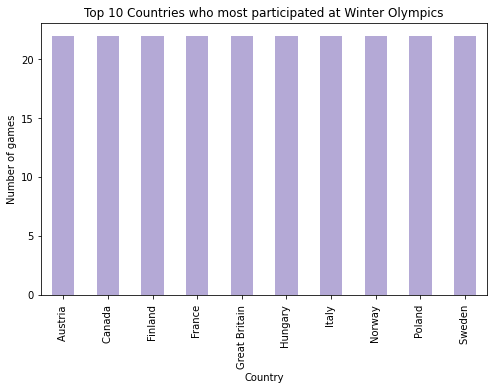

In [17]:
participant_w = olympics_df.nlargest(n=10, columns='Winter Olympics')
participant_w = participant_w.groupby("Country", axis=0).sum()
participant_w.head()
participant_w['Winter Olympics'].sort_values(ascending=False).plot(kind='bar', figsize=(8, 5), rot=90, color=(0.35, 0.25, 0.65, 0.45))
plt.title('Top 10 Countries who most participated at Winter Olympics')
plt.ylabel('Number of games')
plt.xticks(rotation=90)

**Difference Games between Summer and Winter Olympics**

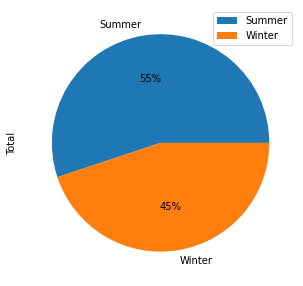

In [18]:
summer = oly_df['Summer Olympics'][146]
winter = oly_df['Winter Olympics'][146]
test_df = pd.DataFrame({'Total':[summer,winter]
                       }, index = ['Summer','Winter'])
test_df
plot_pie = test_df.plot.pie(y='Total', figsize=(5, 5), autopct='%1.0f%%')